## 5.1  For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv('AXISBANK.csv')
data_df.head()
# data_df.shape

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,15-May-2017,503.0,505.00,508.50,498.40,500.25,500.1,502.95,8806756,4.429384e+09,109965,4320438,49.06
1,AXISBANK,EQ,16-May-2017,500.1,502.10,504.50,493.50,502.05,501.5,499.85,8610492,4.303938e+09,101028,4027982,46.78
2,AXISBANK,EQ,17-May-2017,501.5,501.35,506.75,498.50,502.00,502.8,502.88,6443135,3.240154e+09,84189,2876528,44.64
3,AXISBANK,EQ,18-May-2017,502.8,498.00,499.10,490.25,492.85,492.0,494.96,9227022,4.566993e+09,95624,5348691,57.97
4,AXISBANK,EQ,19-May-2017,492.0,495.75,503.85,494.20,501.90,501.7,499.10,7611430,3.798900e+09,72985,4190505,55.06


In [3]:
data_df = data_df[data_df.Series == 'EQ']
data_df.shape

(494, 15)

In [4]:
data_df['Date'] = pd.to_datetime(data_df.Date)

In [5]:
data_df['Daily_Return'] = data_df['Close Price'].pct_change()*100

In [6]:
data_df['Daily_Return'][0] =(data_df['Close Price'][0]/ data_df['Prev Close'][0]- 1)*100 

In [7]:
data_df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily_Return
0,AXISBANK,EQ,2017-05-15,503.0,505.00,508.50,498.40,500.25,500.1,502.95,8806756,4.429384e+09,109965,4320438,49.06,-0.576541
1,AXISBANK,EQ,2017-05-16,500.1,502.10,504.50,493.50,502.05,501.5,499.85,8610492,4.303938e+09,101028,4027982,46.78,0.279944
2,AXISBANK,EQ,2017-05-17,501.5,501.35,506.75,498.50,502.00,502.8,502.88,6443135,3.240154e+09,84189,2876528,44.64,0.259222
3,AXISBANK,EQ,2017-05-18,502.8,498.00,499.10,490.25,492.85,492.0,494.96,9227022,4.566993e+09,95624,5348691,57.97,-2.147971
4,AXISBANK,EQ,2017-05-19,492.0,495.75,503.85,494.20,501.90,501.7,499.10,7611430,3.798900e+09,72985,4190505,55.06,1.971545


**Daily and Annual mean return -**

In [8]:
daily_mean_return = data_df.Daily_Return.values.mean()
daily_mean_return

0.09118301614303356

In [9]:
expected_annual_return = daily_mean_return * 252 
expected_annual_return

22.978120068044458

**Daily and Annual std of returns**

In [10]:
daily_std_return = data_df.Daily_Return.values.std()
daily_std_return

1.7474260150803116

In [11]:
annual_std_return = daily_std_return * np.sqrt(252)
annual_std_return

27.739528022322645

## 5.2 Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance ) 

In [12]:
adani = pd.read_csv('stock_data/ADANIPOWER.csv')
bajaj = pd.read_csv('stock_data/BAJAJELEC.csv')
inf = pd.read_csv('stock_data/INFY.csv')
raymond = pd.read_csv('stock_data/RAYMOND.csv')
suntv = pd.read_csv('stock_data/SUNTV.csv')
tcs = pd.read_csv('stock_data/TCS.csv')

In [13]:
for com in [adani, bajaj, inf, raymond, suntv, tcs]:
    print(com.shape[0])

494
494
496
494
494
498


In [14]:
def pre_process(com):
    com = com[com.Series == 'EQ']
    com['Date'] = pd.to_datetime(com.Date)
    com['Daily_Return'] = com['Close Price'].pct_change()*100
    com['Daily_Return'][0] = (com['Close Price'][0]/ com['Prev Close'][0]-1)*100
    return com

In [15]:
adani = pre_process(adani)
adani.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily_Return
0,ADANIPOWER,EQ,2017-05-15,30.25,30.40,30.50,30.10,30.35,30.25,30.28,2666848,8.074250e+07,4292,861729,32.31,0.000000
1,ADANIPOWER,EQ,2017-05-16,30.25,30.35,33.65,30.35,32.80,32.85,32.59,39322702,1.281594e+09,57037,5217922,13.27,8.595041
2,ADANIPOWER,EQ,2017-05-17,32.85,32.95,33.75,32.45,33.00,33.10,33.13,27368209,9.067376e+08,38034,3760475,13.74,0.761035
3,ADANIPOWER,EQ,2017-05-18,33.10,32.80,32.85,31.70,31.90,31.90,32.37,9833756,3.182696e+08,15013,2046350,20.81,-3.625378
4,ADANIPOWER,EQ,2017-05-19,31.90,33.25,33.25,32.00,32.45,32.40,32.55,12551755,4.085741e+08,20421,2456282,19.57,1.567398


In [16]:
bajaj = pre_process(bajaj)
inf = pre_process(inf)
raymond = pre_process(raymond)
suntv = pre_process(suntv)
tcs = pre_process(tcs)

In [17]:
len(tcs)

494

**Annual Returns--**

In [18]:
adani_returns = adani.Daily_Return.mean()*252
adani_std = adani.Daily_Return.std() * np.sqrt(252)

In [19]:
bajaj_returns = bajaj.Daily_Return.mean()*252
bajaj_std = bajaj.Daily_Return.std()* np.sqrt(252)

In [20]:
inf_returns = inf.Daily_Return.mean()*252
inf_std = inf.Daily_Return.std()* np.sqrt(252)

In [21]:
raymond_returns = raymond.Daily_Return.mean()*252
raymond_std = raymond.Daily_Return.std() * np.sqrt(252)

In [22]:
suntv_returns = suntv.Daily_Return.mean()*252
suntv_std = suntv.Daily_Return.std() * np.sqrt(252)

In [23]:
tcs_returns = tcs.Daily_Return.mean()*252
tcs_std = tcs.Daily_Return.std() * np.sqrt(252)

*Co-Variance*

In [24]:
np.cov(data_df.Daily_Return.values, adani.Daily_Return.values)[0,1]

1.9666636444592502

In [25]:
np.cov(data_df.Daily_Return.values, bajaj.Daily_Return.values)[0,1]

0.9763162710359028

In [26]:
np.cov(data_df.Daily_Return.values, inf.Daily_Return.values)[0,1]

0.04744191566818065

In [27]:
np.cov(data_df.Daily_Return.values, tcs.Daily_Return.values)[0,1]

-0.036316409527860805

In [28]:
np.cov(data_df.Daily_Return.values, suntv.Daily_Return.values)[0,1]

0.8663260287840845

In [29]:
np.cov(data_df.Daily_Return.values, raymond.Daily_Return.values)[0,1]

0.7848790306161418

In [30]:
np.cov(inf.Daily_Return.values, tcs.Daily_Return.values)[0,1]

0.4930169054417705

In [31]:
np.cov(adani.Daily_Return.values, bajaj.Daily_Return.values)[0,1]

2.176396870653935

In [32]:
np.cov(tcs.Daily_Return.values, suntv.Daily_Return.values)[0,1]

0.122128347631316

In [33]:
np.cov(adani.Daily_Return.values, suntv.Daily_Return.values)[0,1]

2.0882552570933575

######    Net Returns and Volatility

In [34]:
Net_Return = (0.2)*adani_returns + (0.2)*bajaj_returns+ (0.2)*inf_returns + (0.2)*raymond_returns +(0.2)*suntv_returns +(0.2)*tcs_returns
Net_Return

10.77890113892173

In [35]:
Net_Volatility = (0.2)*adani_std + (0.2)*bajaj_std+ (0.2)*inf_std + (0.2)*raymond_std +(0.2)*suntv_std +(0.2)*tcs_std
Net_Volatility

51.833268761015155

In [36]:
# creating array of returns and volatility
comp_return = np.array([adani_returns, bajaj_returns, inf_returns, raymond_returns, suntv_returns, tcs_returns])
comp_vol = np.array([adani_std, bajaj_std, inf_std, raymond_std, suntv_std, tcs_std])

## 5.3 Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio. 

In [37]:
def returns_vol(comp_returns, comp_vol, n):
    return_vol = []
    for i in range(n):
        weight = np.random.rand(6)
        weight /= weight.sum()
        return_vol.append((np.dot(comp_return, weight), np.dot(comp_vol, weight)))
    return return_vol

In [38]:
scatter_data = returns_vol(comp_return, comp_vol, 10000)

In [39]:
weight_return = [k[0] for k in scatter_data]

In [40]:
weight_vol = [k[1] for k in scatter_data]

In [41]:
sharpe = [k[0]/k[1] for k in scatter_data]

[Text(0, 0.5, '% returns'), Text(0.5, 0, '% volatility')]

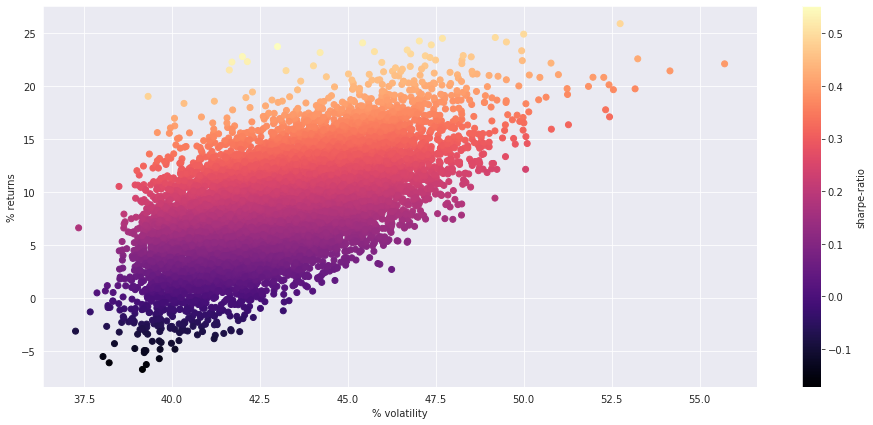

In [44]:

plt.figure(figsize= (16,7))
sns.set_style('darkgrid')

plt.scatter(weight_vol, weight_return, c = sharpe, cmap='magma')
plt.colorbar(label= 'sharpe-ratio')
plt.gca().set(xlabel = '% volatility', ylabel ='% returns')

## 5.4 Mark the 2 portfolios where -


Portfolio 1 - The Sharpe ratio is the highest


Portfolio 2 - The volatility is the lowest. 

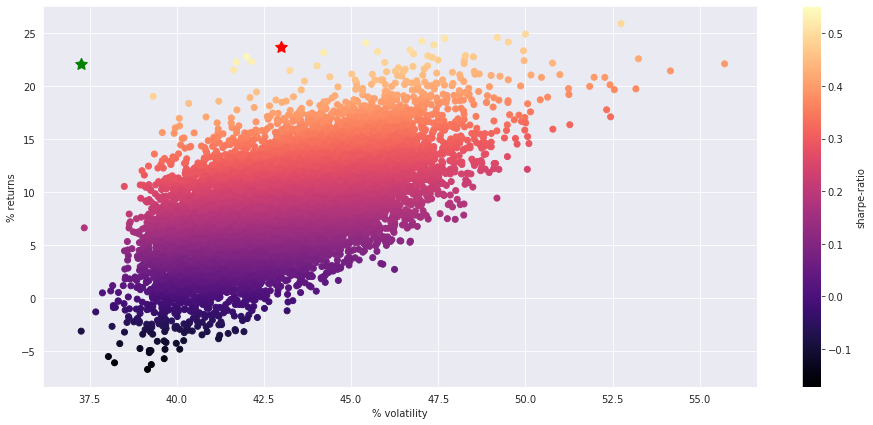

In [45]:
plt.rcParams['figure.figsize'] = 16,7
plt.scatter(weight_vol, weight_return, c = sharpe, cmap='magma')
plt.colorbar(label= 'sharpe-ratio')
plt.gca().set(xlabel = '% volatility', ylabel ='% returns')

# Highest Sharpe ration
plt.scatter(weight_vol[np.argsort(sharpe)[-1]], weight_return[np.argsort(sharpe)[-1]], marker =(5,1,0), c='r', s =150)

# Lowest volatility
plt.scatter(weight_vol[np.argsort(weight_vol)[0]], weight_return[np.argsort(weight_vol)[-1]], marker =(5,1,0), c='g', s=150)